# Machine Learning - Linear Regressions 

In [2]:
# Dependencies 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Data Cleaning and Preparation

In [3]:
# Read the data from AWS/Google Cloud
full_data = pd.read_csv('data/final_crime.csv')
data_14 = pd.read_csv('data/2014_crime.csv')
data_15 = pd.read_csv('data/2015_crime.csv')
data_16 = pd.read_csv('data/2016_crime.csv')
data_17 = pd.read_csv('data/2017_crime.csv')
data_18 = pd.read_csv('data/2018_crime.csv')
data_19 = pd.read_csv('data/2019_crime.csv')
data_20 = pd.read_csv('data/2020_crime.csv')
data_20.head()

C:\Users\smm11\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Report_No,Reported_Date,IBRS,Race,Sex,Age
0,0,KC20000075,1/1/2020,13A,W,F,22.0
1,1,KC20000125,1/1/2020,120,B,M,18.0
2,2,KC20000158,1/1/2020,13A,B,M,NaN
3,3,KC20000242,1/1/2020,120,B,M,NaN
4,4,KC20000268,1/2/2020,NaN,W,F,67.0


In [4]:
# Count and store number of reports per year based on rows in CSV files
index14=data_14["Report_No"]
amount14=len(index14)

index15=data_15["Report_No"]
amount15=len(index15)

index16=data_16["Report_No"]
amount16=len(index16)

index17=data_17["Report_No"]
amount17=len(index17)

index18=data_18["Report_No"]
amount18=len(index18)

index19=data_19["Report_No"]
amount19=len(index19)

# Add 25% to 2020 in order to accomodate for the remaining three months of the year
index20=data_20["Report_No"]
amount2=len(index20)
amount20=amount2*1.25

# Store all amounts in a single list
yearly_crime_df = pd.DataFrame({'year': [2014,2015,2016,2017,2018,2019,2020], 
                                'crime_total': [amount14, amount15, amount16, amount17, amount18, amount19, amount20]})

yearly_crime_df.head(7)

,year,crime_total
0,2014,124832.0
1,2015,121901.0
2,2016,127877.0
3,2017,132139.0
4,2018,128938.0
5,2019,78046.0
6,2020,89597.5


In [5]:
# Assign X and Y
Xc = yearly_crime_df['year'].values.reshape(-1, 1)
yc = yearly_crime_df['crime_total'].values.reshape(-1, 1)
print(Xc.shape, yc.shape)

(7, 1) (7, 1)


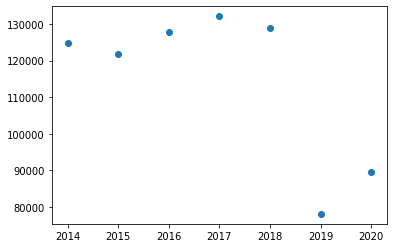

In [6]:
plt.scatter(Xc, yc)

## Total Crime Linear Regression


In [7]:
# Split the data into train and test
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, random_state=10)

In [8]:
# Create a LinearRegression model and fit it to the scaled training data
crime_model = LinearRegression()
crime_model.fit(Xc_train, yc_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', crime_model.coef_)
print('y-axis intercept: ', crime_model.intercept_)

Weight coefficients:  [[-5751.48837209]]
y-axis intercept:  [11715622.65116279]


In [10]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
xc_min = np.array([[Xc.min()]])
xc_max = np.array([[Xc.max()]])
yc_min = crime_model.predict(xc_min)
yc_max = crime_model.predict(xc_max)

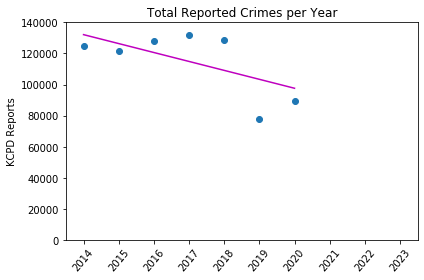

In [32]:
labels=[2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]

plt.scatter(Xc, yc)
plt.plot([xc_min[0], xc_max[0]], [yc_min[0], yc_max[0]], c='m')
plt.ylim(0,140000)
plt.xlim(2013.5,2023.5)
plt.xticks(labels, rotation =50) 
plt.title('Total Reported Crimes per Year')
plt.ylabel('KCPD Reports')
plt.tight_layout()
plt.savefig('outputs/TC_linear')

In [12]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
crime_predictions = crime_model.predict(Xc_test)
crime_MSE = mean_squared_error(yc_test, crime_predictions)
crime_r2 = crime_model.score(Xc_test, yc_test)

print(f"MSE: {crime_MSE}, R2: {crime_r2}")

MSE: 58466127.615802765, R2: 0.8404003963152358


In [14]:
pred21=crime_model.predict([[2021]])
pred22=crime_model.predict([[2022]])
pred23=crime_model.predict([[2021]])
pred2021=pred21[0][0]
pred2022=pred22[0][0]
pred2023=pred23[0][0]

In [15]:
df1 = pd.DataFrame([[2021, pred2021], [2022, pred2022], [2023, pred2023]], columns=['year','crime_total'])
pred_crime_df=yearly_crime_df.append(df1).round()
pred_crime_df

,year,crime_total
0,2014,124832.0
1,2015,121901.0
2,2016,127877.0
3,2017,132139.0
4,2018,128938.0
5,2019,78046.0
6,2020,89598.0
0,2021,91865.0
1,2022,86113.0
2,2023,91865.0


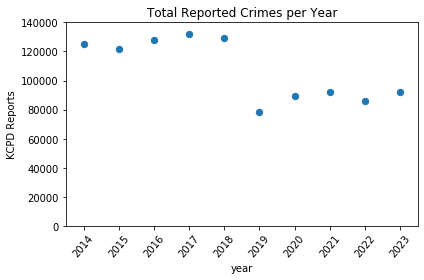

In [31]:
predCrime = pred_crime_df.plot.scatter(x='year', y='crime_total', s=40)
plt.ylim(0,140000)
plt.xlim(2013.5,2023.5)
plt.xticks(labels, rotation =50) 
plt.title('Total Reported Crimes per Year')
plt.ylabel('KCPD Reports')
plt.tight_layout()
plt.savefig('outputs/predC_linear')

# Total Homicide Linear Regression

In [17]:
ibrs2014 = data_14[(data_14["IBRS"] =="09A") | (data_14["IBRS"] =="09B")]
ibrs14=ibrs2014["IBRS"]
murders14=len(ibrs14)

ibrs2015 = data_15[(data_15["IBRS"] =="09A") | (data_15["IBRS"] =="09B")]
ibrs15=ibrs2015["IBRS"]
murders15=len(ibrs15)

ibrs2016 = data_16[(data_16["IBRS"] =="09A") | (data_16["IBRS"] =="09B")]
ibrs16=ibrs2016["IBRS"]
murders16=len(ibrs16)

ibrs2017 = data_17[(data_17["IBRS"] =="09A") | (data_17["IBRS"] =="09B")]
ibrs17=ibrs2017["IBRS"]
murders17=len(ibrs17)

ibrs2018 = data_18[(data_18["IBRS"] =="09A") | (data_18["IBRS"] =="09B")]
ibrs18=ibrs2018["IBRS"]
murders18=len(ibrs18)

ibrs2019 = data_19[(data_19["IBRS"] =="09A") | (data_19["IBRS"] =="09B")]
ibrs19=ibrs2019["IBRS"]
murders19=len(ibrs19)

ibrs2020 = data_20[(data_20["IBRS"] =="09A") | (data_20["IBRS"] =="09B")]
ibrs20=ibrs2020["IBRS"]
murders20=len(ibrs20)

# Store all amounts in a single list
yearly_murder_df = pd.DataFrame({'year': [2014,2015,2016,2017,2018,2019,2020], 
                                'murder_total': [murders14, murders15, murders16, murders17, murders18, murders19, murders20]})

yearly_murder_df.head(7)

,year,murder_total
0,2014,155
1,2015,205
2,2016,251
3,2017,267
4,2018,299
5,2019,264
6,2020,377


In [18]:
# Assign X and Y
Xm = yearly_murder_df['year'].values.reshape(-1, 1)
ym = yearly_murder_df['murder_total'].values.reshape(-1, 1)
print(Xm.shape, ym.shape)

(7, 1) (7, 1)


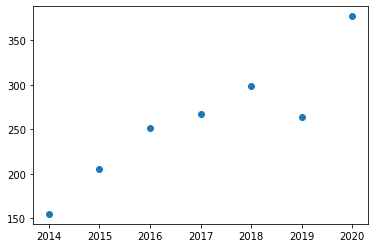

In [19]:
plt.scatter(Xm, ym)

In [20]:
# Split the data into train and test
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, random_state=10)

In [21]:
# Create a LinearRegression model and fit it to the scaled training data
murder_model = LinearRegression()
murder_model.fit(Xm_train, ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', murder_model.coef_)
print('y-axis intercept: ', murder_model.intercept_)

Weight coefficients:  [[24.88372093]]
y-axis intercept:  [-49942.51162791]


In [23]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
xm_min = np.array([[Xm.min()]])
xm_max = np.array([[Xm.max()]])
ym_min = murder_model.predict(xm_min)
ym_max = murder_model.predict(xm_max)

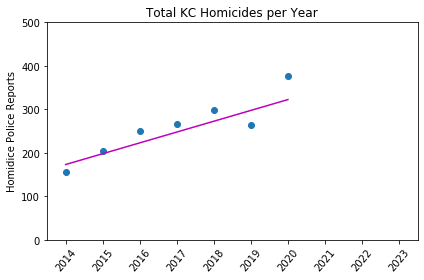

In [33]:
plt.scatter(Xm, ym)
plt.plot([xm_min[0], xm_max[0]], [ym_min[0], ym_max[0]], c='m')
plt.ylim(0,500)
plt.xlim(2013.5,2023.5)
plt.title('Total KC Homicides per Year')
plt.xticks(labels, rotation =50) 
plt.ylabel('Homidice Police Reports')
plt.tight_layout()
plt.savefig('outputs/TM_linear')

In [25]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
murder_predictions = murder_model.predict(Xm_test)
murder_MSE = mean_squared_error(ym_test, murder_predictions)
murder_r2 = murder_model.score(Xm_test, ym_test)

print(f"MSE: {murder_MSE}, R2: {murder_r2}")

MSE: 1869.4759329365002, R2: 0.5289806165440917


In [26]:
mpred21=murder_model.predict([[2021]])
mpred22=murder_model.predict([[2022]])
mpred23=murder_model.predict([[2021]])
mpred2021=mpred21[0][0]
mpred2022=mpred22[0][0]
mpred2023=mpred23[0][0]

In [27]:
df2 = pd.DataFrame([[2021, mpred2021], [2022, mpred2022], [2023, mpred2023]], columns=['year','murder_total'])
pred_murder_df=yearly_murder_df.append(df2).round()
pred_murder_df

,year,murder_total
0,2014,155.0
1,2015,205.0
2,2016,251.0
3,2017,267.0
4,2018,299.0
5,2019,264.0
6,2020,377.0
0,2021,347.0
1,2022,372.0
2,2023,347.0


In [28]:
pred_murder_df.to_csv("outputs/pred_murder_linear.csv")
pred_crime_df.to_csv("outputs/pred_crime_linear.csv")

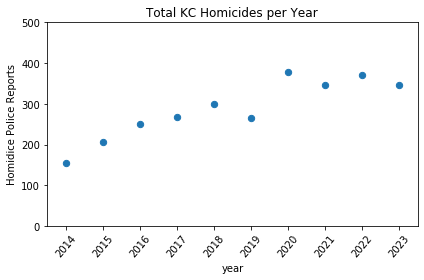

In [30]:
predMurder = pred_murder_df.plot.scatter(x='year', y='murder_total', s=40)
plt.ylim(0,500)
plt.xlim(2013.5,2023.5)
plt.xticks(labels, rotation =50) 
plt.title('Total KC Homicides per Year')
plt.ylabel('Homidice Police Reports')
plt.tight_layout()
plt.savefig('outputs/predM_linear')